In [1]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Download SPY data
ticker_symbol = "SPY"
start_date = "2013-01-01"
end_date = "2023-12-31"
spy_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
# Selecting features and target variable
data = spy_data[['Open', 'High', 'Low', 'Close', 'Volume']]
data['Days'] = (data.index - data.index[0]).days.values

In [4]:
# Split the data into features (X) and target variable (y)
X = data[['Days', 'Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
# Feature scaling for input features only
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

Epoch 1/20
156/156 - 1s - loss: 86557.8281 - 1s/epoch - 8ms/step
Epoch 2/20
156/156 - 0s - loss: 38220.5547 - 168ms/epoch - 1ms/step
Epoch 3/20
156/156 - 0s - loss: 7103.4370 - 179ms/epoch - 1ms/step
Epoch 4/20
156/156 - 0s - loss: 4223.2324 - 202ms/epoch - 1ms/step
Epoch 5/20
156/156 - 0s - loss: 2161.6343 - 193ms/epoch - 1ms/step
Epoch 6/20
156/156 - 0s - loss: 985.8206 - 169ms/epoch - 1ms/step
Epoch 7/20
156/156 - 0s - loss: 510.0168 - 296ms/epoch - 2ms/step
Epoch 8/20
156/156 - 0s - loss: 293.7983 - 324ms/epoch - 2ms/step
Epoch 9/20
156/156 - 0s - loss: 187.3021 - 222ms/epoch - 1ms/step
Epoch 10/20
156/156 - 0s - loss: 134.2182 - 153ms/epoch - 982us/step
Epoch 11/20
156/156 - 0s - loss: 105.0973 - 179ms/epoch - 1ms/step
Epoch 12/20
156/156 - 0s - loss: 84.9939 - 326ms/epoch - 2ms/step
Epoch 13/20
156/156 - 0s - loss: 69.9910 - 191ms/epoch - 1ms/step
Epoch 14/20
156/156 - 0s - loss: 58.5763 - 169ms/epoch - 1ms/step
Epoch 15/20
156/156 - 0s - loss: 49.5879 - 186ms/epoch - 1ms/step
Ep

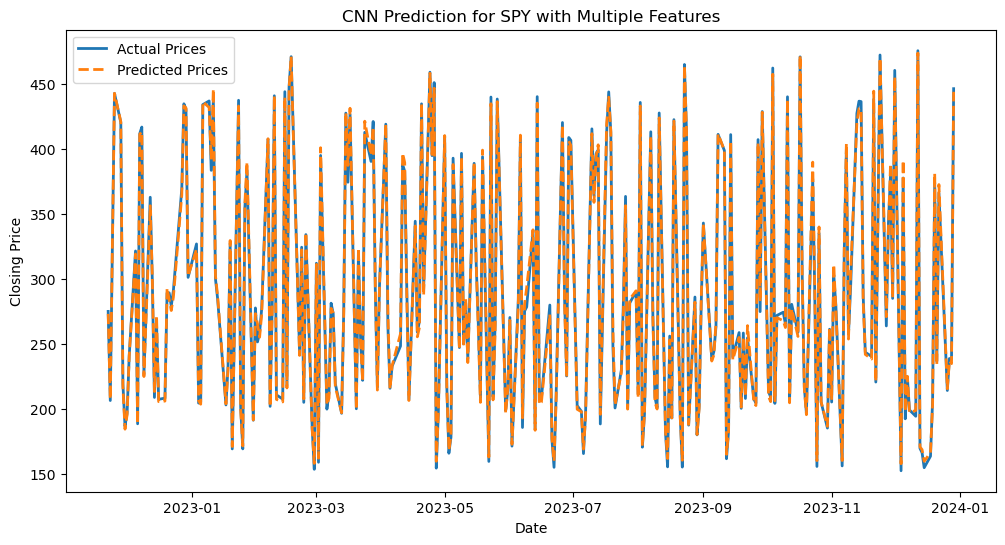

In [7]:
# Reshape data for 1D CNN
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build a simple 1D CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=16, verbose=2)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Evaluate the model
mae_CNN = mean_absolute_error(y_test, y_pred)
mse_CNN = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae_CNN}")
print(f"Mean Squared Error: {mse_CNN}")

# Plot the actual vs. predicted prices without scaling
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('CNN Prediction for SPY with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Epoch 1/20
156/156 - 1s - loss: 38106.1523 - 990ms/epoch - 6ms/step
Epoch 2/20
156/156 - 0s - loss: 1003.2365 - 239ms/epoch - 2ms/step
Epoch 3/20
156/156 - 0s - loss: 500.6438 - 239ms/epoch - 2ms/step
Epoch 4/20
156/156 - 0s - loss: 386.6246 - 254ms/epoch - 2ms/step
Epoch 5/20
156/156 - 0s - loss: 342.3779 - 336ms/epoch - 2ms/step
Epoch 6/20
156/156 - 0s - loss: 331.0569 - 359ms/epoch - 2ms/step
Epoch 7/20
156/156 - 0s - loss: 305.7120 - 362ms/epoch - 2ms/step
Epoch 8/20
156/156 - 0s - loss: 290.3188 - 340ms/epoch - 2ms/step
Epoch 9/20
156/156 - 0s - loss: 262.1182 - 323ms/epoch - 2ms/step
Epoch 10/20
156/156 - 0s - loss: 242.0972 - 290ms/epoch - 2ms/step
Epoch 11/20
156/156 - 0s - loss: 220.5490 - 261ms/epoch - 2ms/step
Epoch 12/20
156/156 - 0s - loss: 194.9257 - 259ms/epoch - 2ms/step
Epoch 13/20
156/156 - 0s - loss: 155.2509 - 258ms/epoch - 2ms/step
Epoch 14/20
156/156 - 0s - loss: 131.1229 - 288ms/epoch - 2ms/step
Epoch 15/20
156/156 - 0s - loss: 95.6629 - 271ms/epoch - 2ms/step
Ep

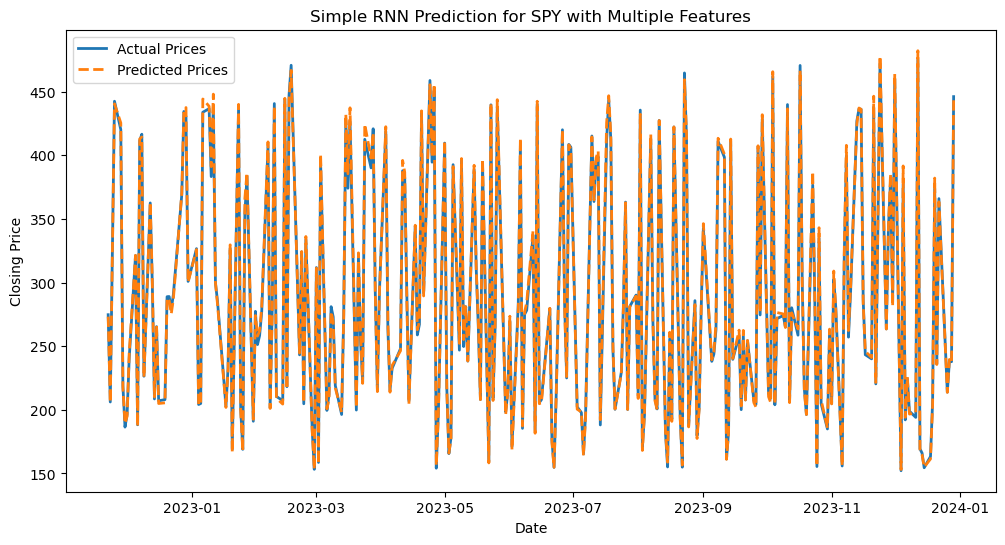

In [8]:
# Build a simple RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=16, verbose=2)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Evaluate the model without scaling predictions
mae_RNN = mean_absolute_error(y_test, y_pred)
mse_RNN = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae_RNN}")
print(f"Mean Squared Error: {mse_RNN}")

# Plot the actual vs. predicted prices without scaling
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('Simple RNN Prediction for SPY with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Epoch 1/20
156/156 - 1s - loss: 55740.1445 - 1s/epoch - 9ms/step
Epoch 2/20
156/156 - 0s - loss: 922.8284 - 353ms/epoch - 2ms/step
Epoch 3/20
156/156 - 0s - loss: 325.2580 - 350ms/epoch - 2ms/step
Epoch 4/20
156/156 - 0s - loss: 260.5430 - 470ms/epoch - 3ms/step
Epoch 5/20
156/156 - 0s - loss: 228.5967 - 395ms/epoch - 3ms/step
Epoch 6/20
156/156 - 0s - loss: 192.7901 - 412ms/epoch - 3ms/step
Epoch 7/20
156/156 - 0s - loss: 181.1887 - 424ms/epoch - 3ms/step
Epoch 8/20
156/156 - 0s - loss: 153.7774 - 348ms/epoch - 2ms/step
Epoch 9/20
156/156 - 0s - loss: 126.7885 - 400ms/epoch - 3ms/step
Epoch 10/20
156/156 - 0s - loss: 109.7008 - 375ms/epoch - 2ms/step
Epoch 11/20
156/156 - 0s - loss: 79.3426 - 364ms/epoch - 2ms/step
Epoch 12/20
156/156 - 0s - loss: 53.8628 - 365ms/epoch - 2ms/step
Epoch 13/20
156/156 - 0s - loss: 35.2795 - 366ms/epoch - 2ms/step
Epoch 14/20
156/156 - 0s - loss: 24.5274 - 355ms/epoch - 2ms/step
Epoch 15/20
156/156 - 0s - loss: 17.9157 - 372ms/epoch - 2ms/step
Epoch 16/2

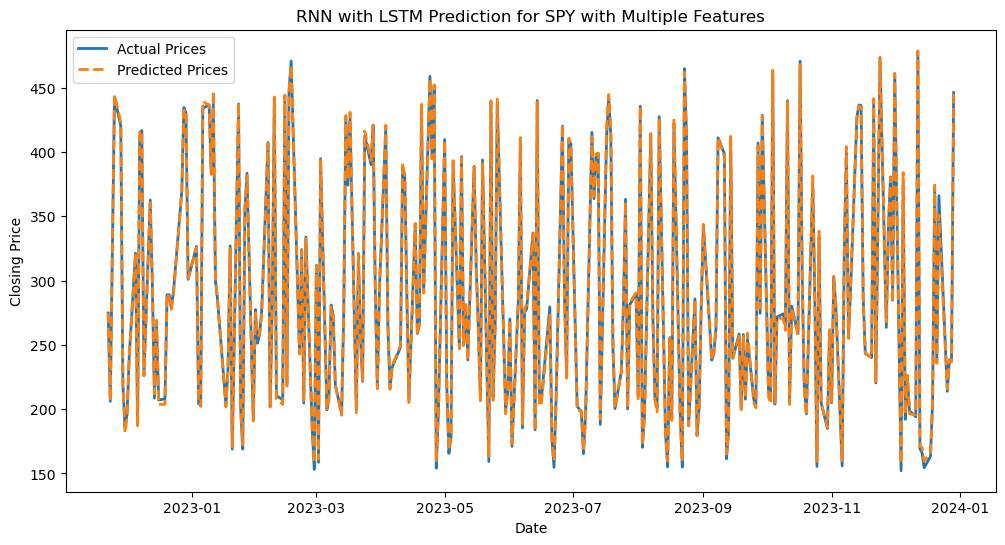

In [9]:
# Build a simple RNN model with LSTM cells
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=16, verbose=2)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Evaluate the model without scaling predictions
mae_LSTM = mean_absolute_error(y_test, y_pred)
mse_LSTM = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae_LSTM}")
print(f"Mean Squared Error: {mse_LSTM}")

# Plot the actual vs. predicted prices without scaling
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('RNN with LSTM Prediction for SPY with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Epoch 1/20
156/156 - 2s - loss: 73748765999104.0000 - 2s/epoch - 10ms/step
Epoch 2/20
156/156 - 0s - loss: 27021570.0000 - 372ms/epoch - 2ms/step
Epoch 3/20
156/156 - 0s - loss: 683273.0625 - 359ms/epoch - 2ms/step
Epoch 4/20
156/156 - 0s - loss: 674810.3125 - 364ms/epoch - 2ms/step
Epoch 5/20
156/156 - 0s - loss: 656677.5625 - 359ms/epoch - 2ms/step
Epoch 6/20
156/156 - 0s - loss: 637369.6250 - 358ms/epoch - 2ms/step
Epoch 7/20
156/156 - 0s - loss: 625033.0000 - 369ms/epoch - 2ms/step
Epoch 8/20
156/156 - 0s - loss: 614213.0625 - 353ms/epoch - 2ms/step
Epoch 9/20
156/156 - 0s - loss: 586244.5000 - 361ms/epoch - 2ms/step
Epoch 10/20
156/156 - 0s - loss: 560840.6875 - 366ms/epoch - 2ms/step
Epoch 11/20
156/156 - 0s - loss: 542372.2500 - 361ms/epoch - 2ms/step
Epoch 12/20
156/156 - 0s - loss: 520819.4688 - 360ms/epoch - 2ms/step
Epoch 13/20
156/156 - 0s - loss: 491858.0000 - 374ms/epoch - 2ms/step
Epoch 14/20
156/156 - 0s - loss: 484185.8750 - 354ms/epoch - 2ms/step
Epoch 15/20
156/156 -

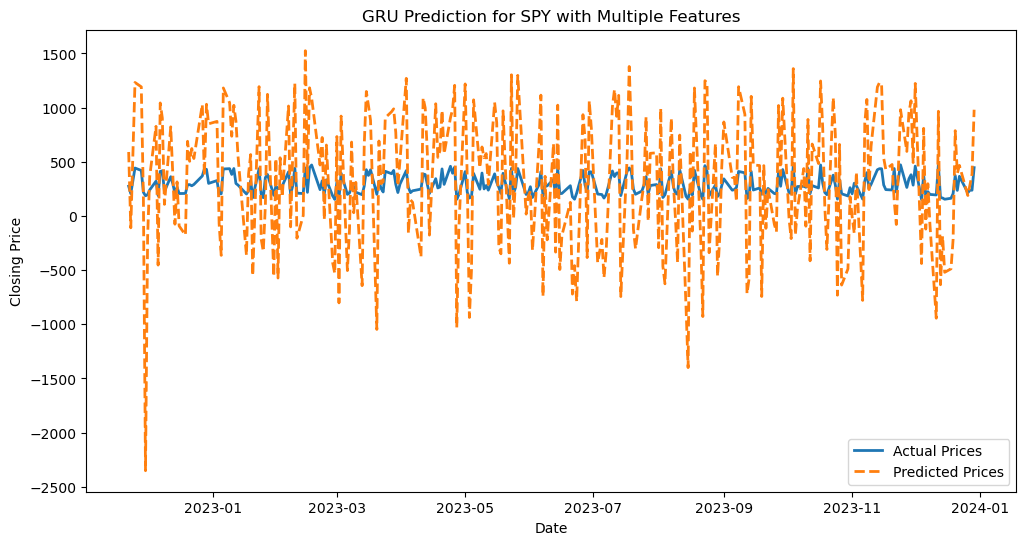

In [10]:
# Build a GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=2)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model without scaling predictions
mae_gru = mean_absolute_error(y_test, y_pred)
mse_gru = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error - GRU: {mae_gru}")
print(f"Mean Squared Error - GRU: {mse_gru}")

# Plot the actual vs. predicted prices without scaling
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', linewidth=2)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--', linewidth=2)
plt.title('GRU Prediction for SPY with Multiple Features')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [11]:
print(f"Mean Absolute Error - CNN: {mae_CNN}")
print(f"Mean Squared Error - CNN: {mse_CNN}")
print(f"Mean Absolute Error - RNN: {mae_RNN}")
print(f"Mean Squared Error - RNN: {mse_RNN}")
print(f"Mean Absolute Error - LSTM: {mae_LSTM}")
print(f"Mean Squared Error - LSTM: {mse_LSTM}")
print(f"Mean Absolute Error - GRU: {mae_gru}")
print(f"Mean Squared Error - GRU: {mse_gru}")

Mean Absolute Error - CNN: 3.229790697889638
Mean Squared Error - CNN: 17.5069902271498
Mean Absolute Error - RNN: 2.6501318866165104
Mean Squared Error - RNN: 13.119794608646036
Mean Absolute Error - LSTM: 2.085529974651681
Mean Squared Error - LSTM: 7.657760609630563
Mean Absolute Error - GRU: 476.90022801147904
Mean Squared Error - GRU: 316613.9865062607
